#### Projet Laptop ####
- Le but est de prédire les prix des laptop, l'unité est ₹
- Vous allez appliqué tout le process qu'on a vu ensemble
- Vous devez aussi créer et déployer une application web qui exploite les solutions proposées   
en utilisant streamlit et Heroku 


## Consignes, conseils et remarques :
- ➢ Le code doit être commenté.
- ➢ Le projet sera sur Gitlab. 
    - Il y aura plusieurs branches :
        - Main/Master : branche de production
        - Test : pour tester les fonctionnalités avant de les merger sur la branche de production
        - Dev : branche de développement des sprints
        - Une branche par tâches : le développement des différentes fonctionnalités ne se feront pas directement sur  la branche DEV, mais sur des branches prévues à  cette effet
- ➢ Le projet commencera par un sprint 0 qui consistera à :
    - Bien analyser le projet permettant de trouver le workflow à suivre pour répondre à la question
    - ➢ sprint 1 qui consistera à analyser et traiter les données (analyses univariés, bivariés, visualisation, EDA, ...)
    - ➢ sprint 2 qui consistera à créer et optimiser des modèles  de ML
    - ➢ sprint 3 qui consistera à créer & déployer  une application web avec streamlit Heroku


In [2]:
####Importation des packagins :

import pandas as pd
import numpy as np

#Packaging de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#packaging preprocessing
from sklearn.preprocessing import OrdinalEncoder

#selection de model
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

#packaging model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#packagng metrics
from sklearn.metrics import make_scorer, mean_squared_error



import warnings
warnings.filterwarnings('ignore')

In [3]:
laptop = pd.read_csv('laptop_data.csv', index_col=0)
df = laptop.copy()

# Démarche à suivre : 


## Sprint 1 : 
- 1. Prise de connaissance de notre BDD : 
    - Description des colonnes 
    - Nombre de features 
    - Type de features  
        - continue, discrete, ordinale, nominale 
    - type de la target (continue/discrete) ?
    - Données manquantes ?
        - vrai NaN ou information sur l'absence d'un element d'une colonne ?
- 2. Analyse univariée (Imputing ou nettoyage des NaN) :
    - variables categoriques : countplot et remplacement par le mode
    - variables numeriques : boxplot et remplacement par la moyenne (ou mediane si trop d'outliers)
- 3. Analyse bi-variée (target vs features) : 
    - Si categorique vs continue : boxplot **ANOVA**
    - Si variable categorique vs categorique : **Khi2**
    - Si variable continue vs continue : **corrélation**

- 4. Encodage des données:
    - variable categorique  = variables ordinale, nominale et discrete :
        - on encode les variables nominales et ordinales 
- 5. Normalisation des données : 

- 6. Sauvegarde et exportation des données nettoyées

## Sprint 2 : 

### Creation de n notebook,  chacun d'entre eux prendront un modèle différent

- 1. Création du modèle 
- 2. Mesure de la performence du modèle 
- 3. Amélioration du modèle
    - select features, gridsearch, ..
- 4. mesure performence du modèle amélioré

## Sprint 3 : 

- Création & déploiment d'une application web avec streamlit Heroku

# Sprint 1 
## 1. Analyse de la BDD

In [4]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.shape

(1303, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [7]:
df.Weight.nunique()

179

In [8]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
for i in df.nunique().sort_values().index:
    if df[i].nunique()<=40:
        print(f"{i} : \nmode = {df[i].nunique()} \n {df[i].unique()[:5]}\n")
#on obtient uniquement des variables categoriques

TypeName : 
mode = 6 
 ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible']

Ram : 
mode = 9 
 ['8GB' '16GB' '4GB' '2GB' '12GB']

OpSys : 
mode = 9 
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux']

Inches : 
mode = 18 
 [13.3 15.6 15.4 14.  12. ]

Company : 
mode = 19 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell']

Memory : 
mode = 39 
 ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD']

ScreenResolution : 
mode = 40 
 ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768']



In [10]:
for i in df.nunique().sort_values().index:
    if df[i].nunique()>40:
        print(f"{i} : \nmode = {df[i].nunique()} \n {df[i].unique()[:5]}\n")
#Seule price et Weight sont des variables numériques continues

Gpu : 
mode = 110 
 ['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650']

Cpu : 
mode = 118 
 ['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz']

Weight : 
mode = 179 
 ['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg']

Price : 
mode = 791 
 [ 71378.6832  47895.5232  30636.     135195.336   96095.808 ]



**Récupération de la target**

In [11]:
target = df.Price

## Bilan de l'analyse : 

- 11 colonnes dont une target **Price** de type **continue**
- **Pas de données manquantes**
- 10 features : 
    - **1 numérique continue** : **Weight**
    - **8 catégoriques** dont :
        - **1 discrètes** : **Inches**

- Parmis nos variables categoriques, 2 prennent plus de 100 valeurs différente : **Cpu, Gpu**.

- A noter que d'autres variables catégoriques prennent beaucoup de modalité aussi : **ScreenResolution, Memory**.

- Il faudra aussi **réencoder** la variable **Weight** afin de la transformer en **float**


#### Commençons par travailler sur Cpu et Gpu, et regardons s'il est possible de réduire le nombre de modalité :

In [12]:
df.loc[:10,['Cpu','Gpu']]

,Cpu,Gpu
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650
5,AMD A9-Series 9420 3GHz,AMD Radeon R5
6,Intel Core i7 2.2GHz,Intel Iris Pro Graphics
7,Intel Core i5 1.8GHz,Intel HD Graphics 6000
8,Intel Core i7 8550U 1.8GHz,Nvidia GeForce MX150
9,Intel Core i5 8250U 1.6GHz,Intel UHD Graphics 620


**Observations :** 
- Dans un premier temps, essayons de réduire le nombre de modalité en capturant uniquement le premier mot pour chaque itération

### Réduction des modalités : 

In [13]:
Gpu_enc = []
for i in df.Gpu.str.split(' '):
    Gpu_enc.append(i[0])

In [14]:
pd.Series(Gpu_enc).unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [15]:
Cpu_enc = []
for i in df.Cpu.str.split(' '):
    Cpu_enc.append(i[0])

In [16]:
pd.Series(Cpu_enc).unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

**Observations :**
- On est passé de plus de 100 modalités différentes a moins de 5

#### Remplacement des anciennes features par ces deux nouvelles :

In [17]:
df.Gpu, df.Cpu = Gpu_enc, Cpu_enc

In [18]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,8GB,128GB SSD,Intel,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel,8GB,128GB Flash Storage,Intel,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel,8GB,256GB SSD,Intel,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,16GB,512GB SSD,AMD,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,8GB,256GB SSD,Intel,macOS,1.37kg,96095.8080


### Réitérons pour ScreenResolution :

In [19]:
df.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [20]:
df.ScreenResolution.str.rsplit(n = 1, expand=True) 
#n permet de definir le nombre de split, ici = 1 donc 1 split max
#expand = True permet de separer en colonne (1 split, donc separation en 2 colonnes)

,0,1
0,IPS Panel Retina Display,2560x1600
1,1440x900,None
2,Full HD,1920x1080
3,IPS Panel Retina Display,2880x1800
4,IPS Panel Retina Display,2560x1600
...,...,...
1298,IPS Panel Full HD / Touchscreen,1920x1080
1299,IPS Panel Quad HD+ / Touchscreen,3200x1800
1300,1366x768,None
1301,1366x768,None


In [21]:
Screen_enc = df.ScreenResolution.str.rsplit(n = 1, expand=True)[0]

In [22]:
print("Ancien nombre de modalité :", df.ScreenResolution.nunique())
print("Nouveau nombre de modalité :", Screen_enc.nunique())
print("Soit une réduction de ",df.ScreenResolution.nunique()-Screen_enc.nunique(), "modalités")

Ancien nombre de modalité : 40
Nouveau nombre de modalité : 25
Soit une réduction de  15 modalités


In [23]:
#Remplacement de ScreenResolution par notre nouvelle variable : 
df.ScreenResolution = Screen_enc

###  Pour Memory :

In [24]:
df.Memory.value_counts()
#beaucoup de modalité avec de très faible effectif.

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
Memory_enc = df.Memory.str.rsplit(n=0, expand=True)[0]

In [26]:
df['Memory'] = Memory_enc

## Réencodage de weight

In [27]:
df.Weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [28]:
df['Weight'] = df.Weight.str.replace('kg', '').astype(float)

### Regardons de nouveau les modalités de chaque variables de notre dataframe : 

In [29]:
for i in df.nunique().sort_values().index:
    if df[i].nunique()<=40:
        print(f"{i} : \nmode = {df[i].nunique()} \n {df[i].unique()[:5]}\n")
#on obtient uniquement des variables categoriques

Cpu : 
mode = 3 
 ['Intel' 'AMD' 'Samsung']

Gpu : 
mode = 4 
 ['Intel' 'AMD' 'Nvidia' 'ARM']

TypeName : 
mode = 6 
 ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible']

Ram : 
mode = 9 
 ['8GB' '16GB' '4GB' '2GB' '12GB']

OpSys : 
mode = 9 
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux']

Memory : 
mode = 14 
 ['128GB' '256GB' '512GB' '500GB' '1TB']

Inches : 
mode = 18 
 [13.3 15.6 15.4 14.  12. ]

Company : 
mode = 19 
 ['Apple' 'HP' 'Acer' 'Asus' 'Dell']

ScreenResolution : 
mode = 25 
 ['IPS Panel Retina Display' '1440x900' 'Full HD' '1366x768'
 'IPS Panel Full HD']



In [30]:
for i in df.nunique().sort_values().index:
    if df[i].nunique()>40:
        print(f"{i} : \nmode = {df[i].nunique()} \n {df[i].unique()[:5]}\n")


Weight : 
mode = 171 
 [1.37 1.34 1.86 1.83 2.1 ]

Price : 
mode = 791 
 [ 71378.6832  47895.5232  30636.     135195.336   96095.808 ]



## Bilan : 
Désormais nous avons une meilleure séparation avec **d'un côté** nos **variables catégoriques** (ordinales+nominales+discrètes) et de **l'autre** nos **variables continues**

In [31]:
var_cat, var_cont = [], []
for i in df.nunique().sort_values().index:
    if df[i].nunique()>40:
        var_cont.append(i)
    else:
        var_cat.append(i)

## 2. Imputing
- Il n'y a pas de NaN donc nous passons cette étape

## 3. Analyse bi-variée
### 3.1 Target vs feature continue

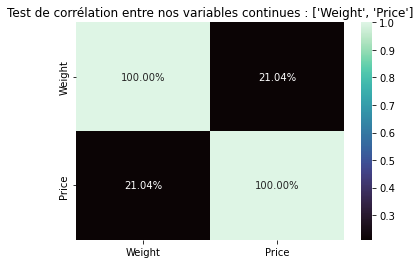

In [32]:
ax = sns.heatmap(df[var_cont].corr(), annot = True, fmt = '.2%', cmap = 'mako')
ax.set_title(f"Test de corrélation entre nos variables continues : {var_cont}")
plt.show()

**Observation :**
- Corrélation non pertinente (<50%) donc nous ne retiendront pas cette variable.

In [33]:
df = df.drop(['Weight', 'Price'], axis = 1)

### 3.1 Target vs features catégoriques

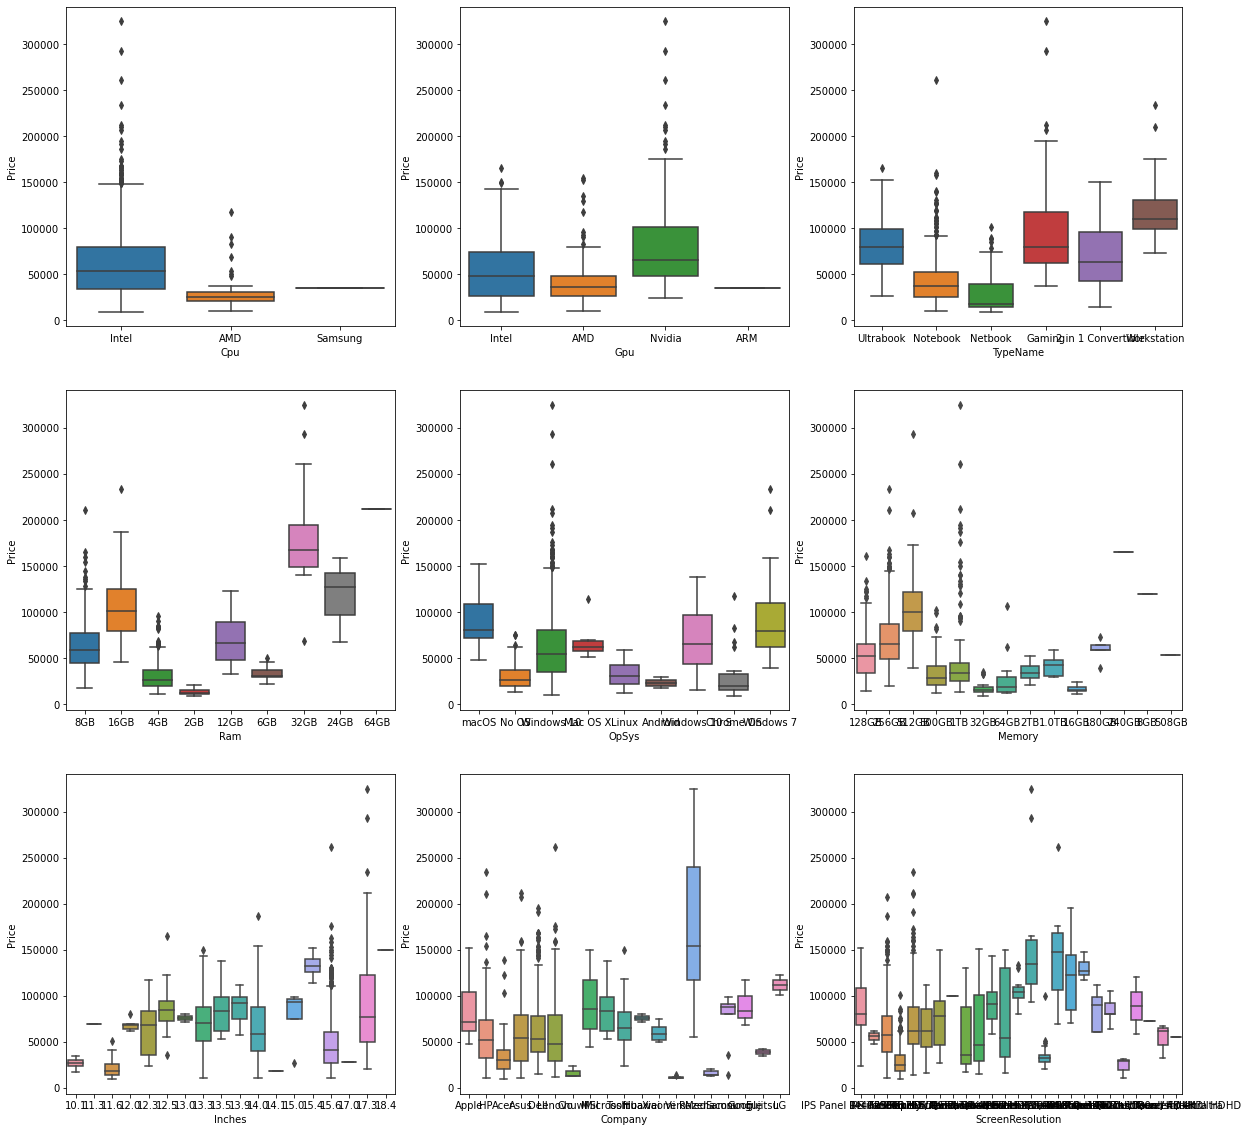

In [34]:
fig, axe = plt.subplots(3,3, figsize=(20,20))
for i in range(len(var_cat)):
    nrow = i//3
    ncol = i % 3
    ax = sns.boxplot(x = df[var_cat[i]], y = target, ax=axe[nrow,ncol])

**Observations :**
- L'hypothèse **H0** : Les variables sont **indépendantes**
- Hypothèse **H1** : les variables sont **dépendantes**.

S'il y a une **variation des médianes** alors les variables sont **dépendantes** et donc **on conserve la feature**. 
- Dans notre cas, pour chaque features, on a une variation des modalité en fonction de la target.
- On **rejette H0** et on **accepte H1** pour tout le monde. Donc on **conserve toutes les variables**

## 4. Encodage des données :

- Pour l'encodage on sait qu'a l'exception de Inches (qui est de type float), toutes les variables doivent être encodés :

In [35]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
dtype: object

In [36]:
var_a_enc = df.describe(include=('object')).columns

In [37]:
encoder = OrdinalEncoder()

In [38]:
df[var_a_enc] = encoder.fit_transform(df[var_a_enc])

In [39]:
df.nunique()

Company             19
TypeName             6
Inches              18
ScreenResolution    25
Cpu                  3
Ram                  9
Memory              14
Gpu                  4
OpSys                9
dtype: int64

# 5. Normalisation des données

**Attention, revenir ici pour voir s'il ne serait pas mieux de normaliser les variables prenant plus de 10 modalités différentes**

In [40]:
var_a_norm = []
for i in df:
    if df[i].nunique()>10:
        var_a_norm.append(i)

In [41]:
#Tester ici et mettre var_a_norm a la place si resultat du modèle n'est pas satisfaisant
df['Inches']  = (df['Inches'] - df['Inches'].mean())/df['Inches'].std()

### Apres avoir tester dans les notebook contenant les modèles, il est préférables de normaliser les données car on obtient de meilleur résultats

In [42]:
df[var_a_norm]  = (df[var_a_norm] - df[var_a_norm].mean())/df[var_a_norm].std()

In [43]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,-1.332677,4.0,-1.203945,1.622362,1.0,8.0,-1.640175,2.0,8.0
1,-1.332677,4.0,-1.203945,-1.228916,1.0,8.0,-1.640175,2.0,8.0
2,0.136425,3.0,0.408615,-0.088405,1.0,8.0,0.042884,2.0,4.0
3,-1.332677,4.0,0.268392,1.622362,1.0,1.0,1.725943,0.0,8.0
4,-1.332677,4.0,-1.203945,1.622362,1.0,8.0,0.042884,2.0,8.0
...,...,...,...,...,...,...,...,...,...
1298,0.870976,0.0,-0.713166,1.052106,1.0,5.0,-1.640175,2.0,5.0
1299,0.870976,0.0,-1.203945,1.432277,1.0,1.0,1.725943,2.0,5.0
1300,0.870976,3.0,-0.713166,-1.419001,1.0,3.0,2.062555,2.0,5.0
1301,0.136425,3.0,0.408615,-1.419001,1.0,7.0,-0.630340,0.0,5.0


# 6. Sauvegarde et exportation des données nettoyées 

### On va aussi reconvertir l'unité de la target en dollar (car elle est en yenne) 
2
**Conversion**
- 1 dollar = 130,88 yen (source : **https://www.google.com/search?sxsrf=ALiCzsY8kOJmIIJzYsqVqFz6zwXC2uPeUw:1659427652400&q=1+yen+en+euro&spell=1&sa=X&ved=2ahUKEwizwIHe2af5AhU0gc4BHSKFDCMQBSgAegQIARA4&biw=1920&bih=880&dpr=1**)

In [44]:
target_dollar = target/130.88

In [45]:
pd.concat([df,target_dollar], axis = 1).to_csv(path_or_buf='laptop_cleaned.csv',index = 0)

In [46]:
laptop.Price.describe()

count      1303.000000
mean      59870.042910
std       37243.201786
min        9270.720000
25%       31914.720000
50%       52054.560000
75%       79274.246400
max      324954.720000
Name: Price, dtype: float64

In [47]:
prix_doll = laptop.Price/130.88

In [48]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys
0,-1.332677,4.0,-1.203945,1.622362,1.0,8.0,-1.640175,2.0,8.0
1,-1.332677,4.0,-1.203945,-1.228916,1.0,8.0,-1.640175,2.0,8.0
2,0.136425,3.0,0.408615,-0.088405,1.0,8.0,0.042884,2.0,4.0
3,-1.332677,4.0,0.268392,1.622362,1.0,1.0,1.725943,0.0,8.0
4,-1.332677,4.0,-1.203945,1.622362,1.0,8.0,0.042884,2.0,8.0
...,...,...,...,...,...,...,...,...,...
1298,0.870976,0.0,-0.713166,1.052106,1.0,5.0,-1.640175,2.0,5.0
1299,0.870976,0.0,-1.203945,1.432277,1.0,1.0,1.725943,2.0,5.0
1300,0.870976,3.0,-0.713166,-1.419001,1.0,3.0,2.062555,2.0,5.0
1301,0.136425,3.0,0.408615,-1.419001,1.0,7.0,-0.630340,0.0,5.0
